In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px

import cv2
from matplotlib.image import imread

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from  keras.utils.np_utils import to_categorical
from  tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

In [2]:
image_dir = 'D:/ResearchIdeas/0.BreastCancer/archive/jpeg'

dicom_data = pd.read_csv('D:/ResearchIdeas/0.BreastCancer/archive/csv/dicom_info.csv')
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


SeriesDescription has 3 types of images:
1. cropped images,
2. full mammogram images,
3. ROI mask images.

Below we will change their directories to local directories and see one example from each one of them.

In [3]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [4]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...
3     D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...
6     D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...
7     D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...
10    D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...
Name: image_path, dtype: object

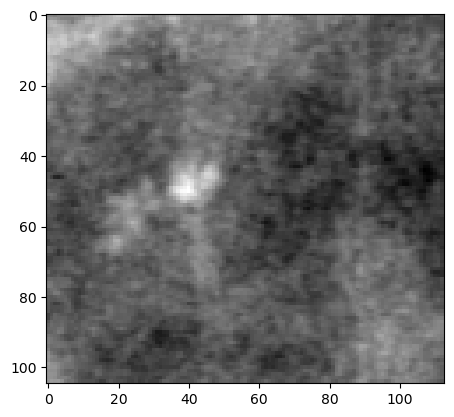

In [5]:
for file in cropped_images[0:10]:
    cropped_images_show = PIL.Image.open(file)
    # "L"-luminance,image has one channel with pixel values representing light intensity
    gray_img= cropped_images_show.convert("L")  
    plt.imshow(gray_img, cmap='gray')

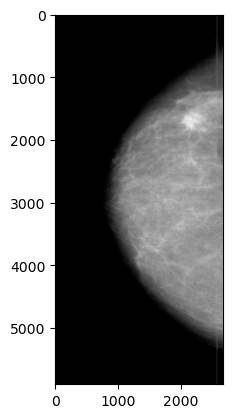

In [6]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
for file  in full_mammogram_images[0:10]:
    full_mammogram_images_show = PIL.Image.open(file)
    gray_img= full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

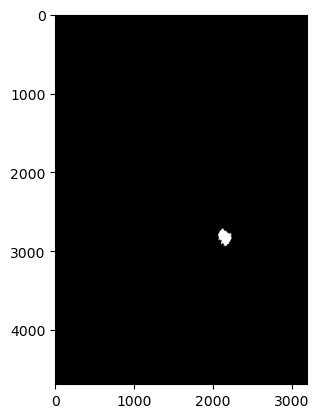

In [7]:
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
for file  in roi_mask_images[0:10]:
    roi_mask_images_show = PIL.Image.open(file)
    gray_img= roi_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [8]:
full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()

for dicom in full_mammogram_images:
    key = dicom.split("/")[5]
    full_mammogram_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[5]
    cropped_dict[key] = dicom
for dicom in roi_mask_images:
    key = dicom.split("/")[5]
    roi_mask_dict[key] = dicom
next(iter((full_mammogram_dict.items())) )

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 'D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

Every image has its identification number (or key in code) goal is to get them and to align with the ones in mass cases below

In [9]:
train_df = pd.read_csv('D:/ResearchIdeas/0.BreastCancer/archive/csv/mass_case_description_train_set.csv')
test_df = pd.read_csv('D:/ResearchIdeas/0.BreastCancer/archive/csv/mass_case_description_test_set.csv')

train_df.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [10]:
def fix_image_path(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[-2]
        dataset.iloc[i,11] = full_mammogram_dict[img_name]
        img_name = img[12].split("/")[-2]
        dataset.iloc[i,12] = cropped_dict[img_name]
        img_name = img[13].split("/")[-2]
        dataset.iloc[i,13] = roi_mask_dict[img_name]
fix_image_path(train_df)
fix_image_path(test_df)
train_df.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...,D:/ResearchIdeas/0.BreastCancer/archive/jpeg/1...


In [11]:
train_df['mass shape'] = train_df['mass shape'].bfill()
train_df['mass margins'] = train_df['mass margins'].bfill()
test_df['mass margins'] = test_df['mass margins'].bfill()
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1318 non-null   object
 7   mass margins             1318 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

### Preprocess images for model training

In [12]:
def image_processor(image_path, target_size):

    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array

# Define the target size
target_size = (224, 224, 3)

# train_df

# Apply preprocessor to train data
train_df['processed_images'] = train_df['image file path'].apply(lambda x: image_processor(x, target_size))
# Convert the processed_images column to an array
X_train = np.array(train_df['processed_images'].tolist())

# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 
y_train = pd.DataFrame()
# Apply class mapper to pathology column
y_train = train_df['pathology'].replace(class_mapper).values

C:\Users\admin\AppData\Local\Temp\ipykernel_22812\1098465121.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = train_df['pathology'].replace(class_mapper).values


In [13]:
# test_df

# Apply preprocessor to train data
test_df['processed_images'] = test_df['image file path'].apply(lambda x: image_processor(x, target_size))
# Convert the processed_images column to an array
X_test = np.array(test_df['processed_images'].tolist())

# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 
y_test = pd.DataFrame()
# Apply class mapper to pathology column
y_test['labels'] = test_df['pathology'].replace(class_mapper).values

C:\Users\admin\AppData\Local\Temp\ipykernel_22812\2872441266.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test['labels'] = test_df['pathology'].replace(class_mapper).values


1. os.path.abspath(image_path)-Converts the relative path of the image to an absolute path: ensuring it can be found regardless of the current working directory.
2. cv2.imread(absolute_image_path)-Loads the image from the specified path into memory as a NumPy array.
3. cv2.cvtColor(image, cv2.COLOR_BGR2RGB)-Changes the color format from BGR (OpenCV default) to RGB.

X_train shape : (1318, 224, 224, 3)
X_test shape : (378, 224, 224, 3)
y_train shape : (1318,)
y_test shape : (378, 1)


Text(0.5, 1.0, '1')

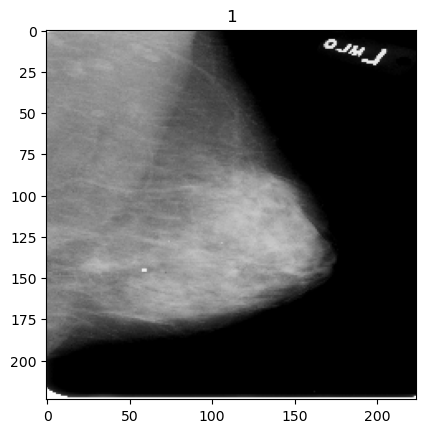

In [14]:
print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

index = 1
plt.imshow(X_train[index])
plt.title(y_train[index])

In [15]:
# Import necessary TensorFlow libraries
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from keras.applications import InceptionResNetV2,VGG19,VGG16
from keras.utils import plot_model

# Augment data
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=20)

# apply augmentation to training data
image_size=224
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=16)

In [16]:
mode = VGG16(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')
for layer in mode.layers[:-5]:
    layer.trainable = False

# instantiate CNN model
model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', 
          kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])


# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# compile model
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train,  validation_split=0.2, epochs = 10 , batch_size = 40)

Epoch 1/10
27/27 [==============================] - 318s 12s/step - loss: 2.8559 - accuracy: 0.5000 - val_loss: 2.3650 - val_accuracy: 0.5227
Epoch 2/10
27/27 [==============================] - 316s 12s/step - loss: 2.0285 - accuracy: 0.6157 - val_loss: 1.7550 - val_accuracy: 0.6061
Epoch 3/10
27/27 [==============================] - 315s 12s/step - loss: 1.5066 - accuracy: 0.6869 - val_loss: 1.3535 - val_accuracy: 0.6591
Epoch 4/10
27/27 [==============================] - 316s 12s/step - loss: 1.1359 - accuracy: 0.7533 - val_loss: 1.1094 - val_accuracy: 0.6818
Epoch 5/10
27/27 [==============================] - 317s 12s/step - loss: 0.8742 - accuracy: 0.8121 - val_loss: 1.1106 - val_accuracy: 0.6364
Epoch 6/10
27/27 [==============================] - 317s 12s/step - loss: 0.6964 - accuracy: 0.8463 - val_loss: 0.9376 - val_accuracy: 0.6629
Epoch 7/10
27/27 [==============================] - 342s 13s/step - loss: 0.5655 - accuracy: 0.8871 - val_loss: 1.0349 - val_accuracy: 0.6629
Epoch 

In [17]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 80s 7s/step - loss: 1.3756 - accuracy: 0.6561


[1.3755589723587036, 0.6560846567153931]